In [82]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import Result
import ast
import math
from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format

In [84]:
from evaluate import plot_learning_curve, plot_accuracy_curve, load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_tsne, plot_multiple_grad_cam, plot_precision_recall

In [85]:
from data_gen import data
from run import characterize_data
from config import config

In [119]:
UUID = "bcf7f0c6-5f37-4561-8497-51ff450d8b99"

#t1: 4e4c0355-9643-4e22-80ba-78dd371c8900
#t1_t: 7b6d44a6-5439-47d5-a2b9-bf62193c0c2e
#t1_post: 2bcb25f3-b326-4f5b-ae3f-41eb90ae36ef
#t1_post_t: e50a3e1e-d292-4eb8-b152-a9a97238b5cb
#t2: 8c10b503-add4-48a0-92e1-49b156b9fb28
#t2_t: 5b548ac7-508c-41b9-8626-c8b8367e71c9

SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [120]:
SELECTIONS = eval(SELECTIONS)

# Learning Curve

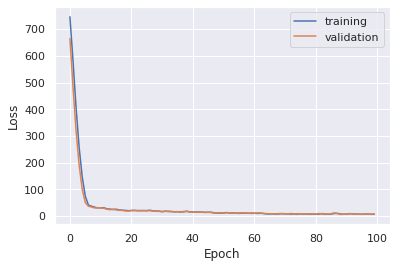

In [121]:
result = Result.query.filter(Result.uuid == UUID).first()
fig = plot_learning_curve(result)
fig.savefig("figures/learning_curves/{}-learning_curve.svg".format(UUID))

# Accuracy Trend

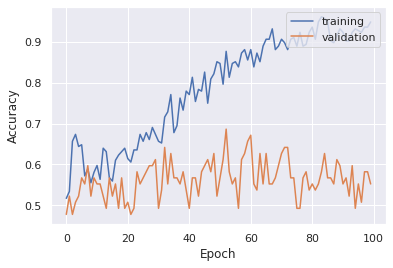

In [122]:
fig = plot_accuracy_curve(result)
fig.savefig("figures/accuracy/{}-accuracy.svg".format(UUID))

In [90]:
print("input form:", result.input_form)

input form: t1


In [123]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [124]:
train, validation, test = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  0%|          | 1/239 [00:00<00:36,  6.55it/s]

Training points = 239
Benign: 131, Malignant: 108

Validation points = 67
Benign: 37, Malignant: 30

Testing points = 33
Benign: 18, Malignant: 15
china062
Does this patient have T1 available? True
I'm doing the thing.
china139
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 3/239 [00:00<00:29,  8.06it/s]

china068
Does this patient have T1 available? True
I'm doing the thing.
chop-92
Does this patient have T1 available? True
I'm doing the thing.
chop-113
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 6/239 [00:00<00:26,  8.66it/s]

china044
Does this patient have T1 available? True
I'm doing the thing.
china101
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 9/239 [00:00<00:23,  9.91it/s]

china123
Does this patient have T1 available? True
I'm doing the thing.
china148
Does this patient have T1 available? True
I'm doing the thing.
penn-023
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-023, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-023-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 364, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundEr

  5%|▌         | 12/239 [00:01<00:20, 11.32it/s]

penn-029
Does this patient have T1 available? True
I'm doing the thing.
china142
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 14/239 [00:01<00:24,  9.33it/s]

china094
Does this patient have T1 available? True
I'm doing the thing.
china090
Does this patient have T1 available? True
I'm doing the thing.
china056
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 16/239 [00:01<00:22, 10.04it/s]

china045
Does this patient have T1 available? True
I'm doing the thing.
china121
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 18/239 [00:01<00:24,  8.86it/s]

chop-106
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 20/239 [00:02<00:34,  6.41it/s]

china070
Does this patient have T1 available? True
I'm doing the thing.
china127
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 22/239 [00:02<00:33,  6.48it/s]

penn-059
Does this patient have T1 available? True
I'm doing the thing.
china084
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 24/239 [00:02<00:29,  7.32it/s]

china080
Does this patient have T1 available? True
I'm doing the thing.
china119
Does this patient have T1 available? True
I'm doing the thing.
chop-52
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 27/239 [00:03<00:30,  7.05it/s]

penn-064
Does this patient have T1 available? True
I'm doing the thing.
chop-98
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 30/239 [00:03<00:29,  7.01it/s]

china136
Does this patient have T1 available? True
I'm doing the thing.
chop-144
Does this patient have T1 available? True
I'm doing the thing.
penn-011
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 31/239 [00:03<00:31,  6.55it/s]

chop-110
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 33/239 [00:04<00:42,  4.84it/s]

chop-121
Does this patient have T1 available? True
I'm doing the thing.
china004
Does this patient have T1 available? True
I'm doing the thing.
china155
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 38/239 [00:04<00:26,  7.68it/s]

china040
Does this patient have T1 available? True
I'm doing the thing.
china035
Does this patient have T1 available? True
I'm doing the thing.
chop-117
Does this patient have T1 available? True
I'm doing the thing.
chop-140
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 40/239 [00:04<00:22,  8.77it/s]

china057
Does this patient have T1 available? True
I'm doing the thing.
chop-143
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 42/239 [00:04<00:22,  8.67it/s]

chop-107
Does this patient have T1 available? True
I'm doing the thing.
china115
Does this patient have T1 available? True
I'm doing the thing.
china012
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 46/239 [00:05<00:18, 10.49it/s]

china050
Does this patient have T1 available? True
I'm doing the thing.
china014
Does this patient have T1 available? True
I'm doing the thing.
chop-118
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 48/239 [00:05<00:21,  8.89it/s]

china077
Does this patient have T1 available? True
I'm doing the thing.
chop-115
Does this patient have T1 available? True
I'm doing the thing.
china018
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 52/239 [00:05<00:17, 10.62it/s]

china105
Does this patient have T1 available? True
I'm doing the thing.
china021
Does this patient have T1 available? True
I'm doing the thing.
penn-065
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 54/239 [00:06<00:23,  7.98it/s]

china063
Does this patient have T1 available? True
I'm doing the thing.
china016
Does this patient have T1 available? True
I'm doing the thing.
china053
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 56/239 [00:06<00:21,  8.70it/s]

china013
Does this patient have T1 available? True
I'm doing the thing.
penn-048
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 58/239 [00:06<00:24,  7.37it/s]

chop-109
Does this patient have T1 available? True
I'm doing the thing.
penn-063
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 62/239 [00:07<00:22,  7.79it/s]

penn-004
Does this patient have T1 available? True
I'm doing the thing.
china087
Does this patient have T1 available? True
I'm doing the thing.
china029
Does this patient have T1 available? True
I'm doing the thing.
china103
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 64/239 [00:07<00:18,  9.51it/s]

china010
Does this patient have T1 available? True
I'm doing the thing.
penn-019
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 68/239 [00:07<00:18,  9.33it/s]

chop-54
Does this patient have T1 available? True
I'm doing the thing.
china047
Does this patient have T1 available? True
I'm doing the thing.
china009
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 70/239 [00:08<00:16, 10.21it/s]

china152
Does this patient have T1 available? True
I'm doing the thing.
china033
Does this patient have T1 available? True
I'm doing the thing.
china109
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 72/239 [00:08<00:15, 11.06it/s]

chop-133
Does this patient have T1 available? True
I'm doing the thing.
china140
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 76/239 [00:08<00:14, 11.51it/s]

china027
Does this patient have T1 available? True
I'm doing the thing.
china038
Does this patient have T1 available? True
I'm doing the thing.
china097
Does this patient have T1 available? True
I'm doing the thing.
penn-026
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 80/239 [00:08<00:12, 12.71it/s]

penn-020
Does this patient have T1 available? True
I'm doing the thing.
china071
Does this patient have T1 available? True
I'm doing the thing.
chop-84
Does this patient have T1 available? True
I'm doing the thing.
china043
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 82/239 [00:08<00:11, 13.11it/s]

china064
Does this patient have T1 available? True
I'm doing the thing.
chop-100
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 86/239 [00:09<00:11, 13.12it/s]

china128
Does this patient have T1 available? True
I'm doing the thing.
penn-010
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   1.000
Name: penn-010, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/penn-010-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 364, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/penn-01

 37%|███▋      | 88/239 [00:10<00:38,  3.96it/s]

china153
Does this patient have T1 available? True
I'm doing the thing.
penn-051
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 90/239 [00:10<00:30,  4.89it/s]

china036
Does this patient have T1 available? True
I'm doing the thing.
chop-122
Does this patient have T1 available? True
I'm doing the thing.
chop-94
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 92/239 [00:11<00:28,  5.24it/s]

penn-075
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 95/239 [00:11<00:23,  6.10it/s]

china054
Does this patient have T1 available? True
I'm doing the thing.
china113
Does this patient have T1 available? True
I'm doing the thing.
china104
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 98/239 [00:11<00:18,  7.75it/s]

chop-96
Does this patient have T1 available? True
I'm doing the thing.
penn-022
Does this patient have T1 available? True
I'm doing the thing.
penn-069
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 100/239 [00:12<00:17,  8.11it/s]

china028
Does this patient have T1 available? True
I'm doing the thing.
china003
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 103/239 [00:12<00:14,  9.38it/s]

chop-53
Does this patient have T1 available? True
I'm doing the thing.
china041
Does this patient have T1 available? True
I'm doing the thing.
china034
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 105/239 [00:12<00:14,  8.98it/s]

china017
Does this patient have T1 available? True
I'm doing the thing.
chop-103
Does this patient have T1 available? True
I'm doing the thing.
chop-105
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 108/239 [00:12<00:14,  8.99it/s]

chop-126
Does this patient have T1 available? True
I'm doing the thing.
penn-002
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 110/239 [00:13<00:16,  7.67it/s]

chop-69
Does this patient have T1 available? True
I'm doing the thing.
china154
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 112/239 [00:13<00:14,  8.83it/s]

china019
Does this patient have T1 available? True
I'm doing the thing.
chop-86
Does this patient have T1 available? True
I'm doing the thing.
chop-97
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 117/239 [00:14<00:16,  7.62it/s]

chop-32
Does this patient have T1 available? True
I'm doing the thing.
china141
Does this patient have T1 available? True
I'm doing the thing.
penn-038
Does this patient have T1 available? True
I'm doing the thing.
chop-73
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 119/239 [00:14<00:14,  8.13it/s]

china143
Does this patient have T1 available? True
I'm doing the thing.
chop-78
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 123/239 [00:14<00:12,  9.23it/s]

chop-28
Does this patient have T1 available? True
I'm doing the thing.
penn-079
Does this patient have T1 available? True
I'm doing the thing.
chop-101
Does this patient have T1 available? True
I'm doing the thing.
china117
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 125/239 [00:14<00:11, 10.31it/s]

chop-18
Does this patient have T1 available? True
I'm doing the thing.
china099
Does this patient have T1 available? True
I'm doing the thing.
chop-27
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 129/239 [00:15<00:11,  9.39it/s]

china138
Does this patient have T1 available? True
I'm doing the thing.
penn-049
Does this patient have T1 available? True
I'm doing the thing.
chop-129
Does this patient have T1 available? True
I'm doing the thing.
chop-119
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 131/239 [00:15<00:17,  6.30it/s]

chop-44
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 132/239 [00:16<00:18,  5.70it/s]

china060
Does this patient have T1 available? True
I'm doing the thing.
chop-42
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 134/239 [00:16<00:17,  5.85it/s]

penn-031
Does this patient have T1 available? True
I'm doing the thing.
chop-67
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 136/239 [00:16<00:15,  6.63it/s]

chop-132
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 138/239 [00:16<00:16,  6.10it/s]

penn-057
Does this patient have T1 available? True
I'm doing the thing.
chop-36
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 140/239 [00:17<00:14,  6.68it/s]

chop-87
Does this patient have T1 available? True
I'm doing the thing.
chop-8
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 142/239 [00:17<00:13,  7.14it/s]

china112
Does this patient have T1 available? True
I'm doing the thing.
china007
Does this patient have T1 available? True
I'm doing the thing.
chop-56
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 145/239 [00:17<00:11,  7.85it/s]

chop-37
Does this patient have T1 available? True
I'm doing the thing.
chop-75
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 147/239 [00:18<00:13,  6.66it/s]

chop-64
Does this patient have T1 available? True
I'm doing the thing.
penn-027
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 148/239 [00:18<00:19,  4.68it/s]

china073
Does this patient have T1 available? True
I'm doing the thing.
penn-016
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 150/239 [00:18<00:17,  5.07it/s]

chop-45
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 152/239 [00:19<00:16,  5.27it/s]

china086
Does this patient have T1 available? True
I'm doing the thing.
china023
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china023, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/china023-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 364, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/preprocessed/china02

 66%|██████▌   | 157/239 [00:19<00:10,  7.74it/s]

penn-015
Does this patient have T1 available? True
I'm doing the thing.
chop-2
Does this patient have T1 available? True
I'm doing the thing.
penn-045
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 159/239 [00:19<00:10,  7.28it/s]

chop-76
Does this patient have T1 available? True
I'm doing the thing.
penn-074
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 161/239 [00:20<00:10,  7.63it/s]

china122
Does this patient have T1 available? True
I'm doing the thing.
chop-142
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 162/239 [00:20<00:10,  7.23it/s]

penn-005
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 165/239 [00:20<00:10,  7.03it/s]

chop-138
Does this patient have T1 available? True
I'm doing the thing.
chop-131
Does this patient have T1 available? True
I'm doing the thing.
china008
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 167/239 [00:20<00:08,  8.00it/s]

chop-29
Does this patient have T1 available? True
I'm doing the thing.
chop-38
Does this patient have T1 available? True
I'm doing the thing.
chop-70
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 169/239 [00:20<00:07,  9.13it/s]

chop-60
Does this patient have T1 available? True
I'm doing the thing.
chop-120
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 171/239 [00:21<00:08,  8.34it/s]

china150
Does this patient have T1 available? True
I'm doing the thing.
chop-57
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 173/239 [00:21<00:08,  7.93it/s]

china059
Does this patient have T1 available? True
I'm doing the thing.
chop-6
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 175/239 [00:21<00:07,  8.41it/s]

china049
Does this patient have T1 available? True
I'm doing the thing.
penn-058
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 177/239 [00:21<00:07,  8.69it/s]

chop-30
Does this patient have T1 available? True
I'm doing the thing.
penn-062
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 180/239 [00:22<00:06,  9.04it/s]

china085
Does this patient have T1 available? True
I'm doing the thing.
chop-20
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 181/239 [00:22<00:06,  8.99it/s]

chop-34
Does this patient have T1 available? True
I'm doing the thing.
chop-71
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 183/239 [00:22<00:06,  9.21it/s]

penn-067
Does this patient have T1 available? True
I'm doing the thing.
chop-11
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 185/239 [00:22<00:06,  8.21it/s]

penn-053
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 186/239 [00:23<00:09,  5.44it/s]

chop-22
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 189/239 [00:23<00:09,  5.54it/s]

china131
Does this patient have T1 available? True
I'm doing the thing.
chop-55
Does this patient have T1 available? True
I'm doing the thing.
china066
Does this patient have T1 available? True
I'm doing the thing.
chop-62
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 191/239 [00:23<00:07,  6.40it/s]

chop-4
Does this patient have T1 available? True
I'm doing the thing.
chop-63
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 194/239 [00:24<00:06,  6.78it/s]

chop-25
Does this patient have T1 available? True
I'm doing the thing.
china052
Does this patient have T1 available? True
I'm doing the thing.
china137
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 197/239 [00:24<00:05,  8.01it/s]

china072
Does this patient have T1 available? True
I'm doing the thing.
chop-139
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 199/239 [00:24<00:05,  6.69it/s]

chop-65
Does this patient have T1 available? True
I'm doing the thing.
china032
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 201/239 [00:24<00:04,  7.74it/s]

penn-042
Does this patient have T1 available? True
I'm doing the thing.
china081
Does this patient have T1 available? True
I'm doing the thing.
penn-037
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 205/239 [00:25<00:03, 10.32it/s]

china006
Does this patient have T1 available? True
I'm doing the thing.
penn-028
Does this patient have T1 available? True
I'm doing the thing.
china107
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 207/239 [00:25<00:02, 11.22it/s]

chop-31
Does this patient have T1 available? True
I'm doing the thing.
penn-007
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 209/239 [00:26<00:04,  6.28it/s]

chop-104
Does this patient have T1 available? True
I'm doing the thing.
chop-135
Does this patient have T1 available? True
I'm doing the thing.
chop-134
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 213/239 [00:26<00:03,  8.19it/s]

china005
Does this patient have T1 available? True
I'm doing the thing.
china110
Does this patient have T1 available? True
I'm doing the thing.
penn-040
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 215/239 [00:26<00:03,  8.00it/s]

china093
Does this patient have T1 available? True
I'm doing the thing.
chop-43
Does this patient have T1 available? True
I'm doing the thing.
china135
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 219/239 [00:26<00:01, 10.09it/s]

penn-070
Does this patient have T1 available? True
I'm doing the thing.
china067
Does this patient have T1 available? True
I'm doing the thing.
chop-24
Does this patient have T1 available? True
I'm doing the thing.
chop-59
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 221/239 [00:27<00:01, 10.59it/s]

china156
Does this patient have T1 available? True
I'm doing the thing.
chop-10
Does this patient have T1 available? True
I'm doing the thing.
penn-021
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 224/239 [00:27<00:01, 10.88it/s]

penn-061
Does this patient have T1 available? True
I'm doing the thing.
penn-025
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 228/239 [00:27<00:01, 10.07it/s]

chop-33
Does this patient have T1 available? True
I'm doing the thing.
chop-141
Does this patient have T1 available? True
I'm doing the thing.
china076
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 230/239 [00:28<00:01,  8.61it/s]

chop-74
Does this patient have T1 available? True
I'm doing the thing.
china015
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 233/239 [00:28<00:00, 10.22it/s]

chop-40
Does this patient have T1 available? True
I'm doing the thing.
china157
Does this patient have T1 available? True
I'm doing the thing.
chop-14
Does this patient have T1 available? True
I'm doing the thing.
chop-114
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 235/239 [00:28<00:00,  9.02it/s]

chop-77
Does this patient have T1 available? True
I'm doing the thing.
chop-17
Does this patient have T1 available? True
I'm doing the thing.


  0%|          | 0/67 [00:00<?, ?it/s]

china106
Does this patient have T1 available? True
I'm doing the thing.
china092
Does this patient have T1 available? True
I'm doing the thing.
china124
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 1/67 [00:00<00:07,  9.39it/s]

penn-013
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 4/67 [00:01<00:20,  3.02it/s]

china116
Does this patient have T1 available? True
I'm doing the thing.
penn-014
Does this patient have T1 available? True
I'm doing the thing.
china108
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 6/67 [00:01<00:16,  3.77it/s]

chop-83
Does this patient have T1 available? True
I'm doing the thing.
china082
Does this patient have T1 available? True
I'm doing the thing.
china144
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 10/67 [00:02<00:09,  5.75it/s]

chop-127
Does this patient have T1 available? True
I'm doing the thing.
china031
Does this patient have T1 available? True
I'm doing the thing.
china118
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 11/67 [00:02<00:08,  6.34it/s]

chop-51
Does this patient have T1 available? True
I'm doing the thing.
chop-128
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 13/67 [00:02<00:07,  6.90it/s]

china074
Does this patient have T1 available? True
I'm doing the thing.
penn-077
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 16/67 [00:02<00:06,  7.40it/s]

china088
Does this patient have T1 available? True
I'm doing the thing.
china126
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 18/67 [00:03<00:07,  6.84it/s]

china058
Does this patient have T1 available? True
I'm doing the thing.
china151
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 20/67 [00:03<00:05,  7.90it/s]

china147
Does this patient have T1 available? True
I'm doing the thing.
penn-044
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 24/67 [00:03<00:06,  7.08it/s]

china089
Does this patient have T1 available? True
I'm doing the thing.
china022
Does this patient have T1 available? True
I'm doing the thing.
china002
Does this patient have T1 available? True
I'm doing the thing.
china075
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 26/67 [00:03<00:05,  7.59it/s]

china046
Does this patient have T1 available? True
I'm doing the thing.
china130
Does this patient have T1 available? True
I'm doing the thing.
china025
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 28/67 [00:04<00:04,  8.45it/s]

penn-035
Does this patient have T1 available? True
I'm doing the thing.
china100
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 30/67 [00:04<00:04,  8.72it/s]

china129
Does this patient have T1 available? True
I'm doing the thing.
chop-19
Does this patient have T1 available? True
I'm doing the thing.
chop-79
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 35/67 [00:04<00:03, 10.50it/s]

penn-068
Does this patient have T1 available? True
I'm doing the thing.
chop-58
Does this patient have T1 available? True
I'm doing the thing.
china055
Does this patient have T1 available? True
I'm doing the thing.
chop-21
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 37/67 [00:04<00:02, 10.16it/s]

china091
Does this patient have T1 available? True
I'm doing the thing.
chop-47
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 39/67 [00:05<00:02,  9.76it/s]

penn-056
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 41/67 [00:05<00:03,  7.84it/s]

chop-7
Does this patient have T1 available? True
I'm doing the thing.
penn-071
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 43/67 [00:05<00:02,  8.62it/s]

china065
Does this patient have T1 available? True
I'm doing the thing.
chop-124
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 45/67 [00:06<00:03,  6.73it/s]

china145
Does this patient have T1 available? True
I'm doing the thing.
penn-032
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 47/67 [00:06<00:03,  6.23it/s]

chop-80
Does this patient have T1 available? True
I'm doing the thing.
chop-23
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 49/67 [00:06<00:03,  5.22it/s]

chop-88
Does this patient have T1 available? True
I'm doing the thing.
chop-89
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 51/67 [00:07<00:02,  6.27it/s]

china149
Does this patient have T1 available? True
I'm doing the thing.
chop-15
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 52/67 [00:07<00:02,  5.50it/s]

chop-72
Does this patient have T1 available? True
I'm doing the thing.
china061
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: sort          -
volume    0.603
outcome   0.000
Name: china061, dtype: object
buffer size must be a multiple of element size
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 364, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 316, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 508, in read
    data = read_data(header, fh, filename, index_order)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 

 84%|████████▎ | 56/67 [00:07<00:01,  5.94it/s]

chop-91
Does this patient have T1 available? True
I'm doing the thing.
china120
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 58/67 [00:08<00:01,  6.65it/s]

chop-137
Does this patient have T1 available? True
I'm doing the thing.
china133
Does this patient have T1 available? True
I'm doing the thing.
chop-116
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 62/67 [00:08<00:00,  7.30it/s]

chop-99
Does this patient have T1 available? True
I'm doing the thing.
china079
Does this patient have T1 available? True
I'm doing the thing.
penn-054
Does this patient have T1 available? True
I'm doing the thing.
chop-130
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 65/67 [00:10<00:00,  3.97it/s]

chop-35
Does this patient have T1 available? True
I'm doing the thing.
china051
Does this patient have T1 available? True
I'm doing the thing.
china078
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 1/33 [00:00<00:05,  5.39it/s]

penn-052
Does this patient have T1 available? True
I'm doing the thing.
chop-93
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 3/33 [00:00<00:04,  6.59it/s]

penn-041
Does this patient have T1 available? True
I'm doing the thing.
penn-034
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 5/33 [00:00<00:04,  6.78it/s]

penn-055
Does this patient have T1 available? True
I'm doing the thing.
penn-024
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 8/33 [00:00<00:02,  8.52it/s]

china026
Does this patient have T1 available? True
I'm doing the thing.
china037
Does this patient have T1 available? True
I'm doing the thing.
chop-49
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 10/33 [00:01<00:02,  8.32it/s]

china042
Does this patient have T1 available? True
I'm doing the thing.
china134
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 11/33 [00:01<00:02,  8.31it/s]

penn-018
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 12/33 [00:01<00:03,  5.66it/s]

chop-95
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 13/33 [00:01<00:04,  4.45it/s]

china146
Does this patient have T1 available? True
I'm doing the thing.
penn-030
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 16/33 [00:02<00:03,  4.96it/s]

penn-039
Does this patient have T1 available? True
I'm doing the thing.
chop-39
Does this patient have T1 available? True
I'm doing the thing.
penn-046
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 18/33 [00:02<00:02,  6.11it/s]

chop-48
Does this patient have T1 available? True
I'm doing the thing.
penn-036
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 21/33 [00:03<00:01,  6.73it/s]

penn-043
Does this patient have T1 available? True
I'm doing the thing.
penn-006
Does this patient have T1 available? True
I'm doing the thing.
chop-9
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 24/33 [00:03<00:01,  6.00it/s]

china132
Does this patient have T1 available? True
I'm doing the thing.
chop-61
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 27/33 [00:04<00:01,  5.79it/s]

china020
Does this patient have T1 available? True
I'm doing the thing.
penn-017
Does this patient have T1 available? True
I'm doing the thing.
chop-41
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 29/33 [00:04<00:00,  7.01it/s]

china114
Does this patient have T1 available? True
I'm doing the thing.
china030
Does this patient have T1 available? True
I'm doing the thing.
penn-047
Does this patient have T1 available? True
I'm doing the thing.


100%|██████████| 33/33 [00:04<00:00,  6.73it/s]


chop-123
Does this patient have T1 available? True
I'm doing the thing.
china125
Does this patient have T1 available? True
I'm doing the thing.


In [93]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))

training N: 236
validation N: 67
test N: 33


In [94]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))

training 1.0: 106
validation 1.0: 30
test 1.0: 15


In [125]:
model = load(MODEL)

In [17]:
model

# Train

In [96]:
results = get_results(model, train)

In [97]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [98]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 0.9703390002250671
Loss: 26.874889373779297


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.970,130,99,7,0,1.000,0.934,0.949,1.000,0.066,0.000,0.051,0.967,0.966
1.000,0.970,99,130,0,7,0.934,1.000,1.000,0.949,0.000,0.066,0.000,0.967,0.966


## Train confusion matrix

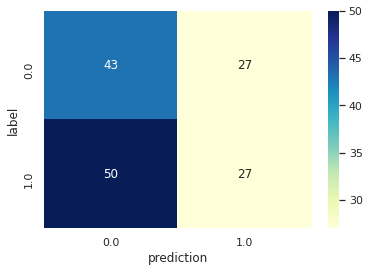

In [21]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train ROC curve

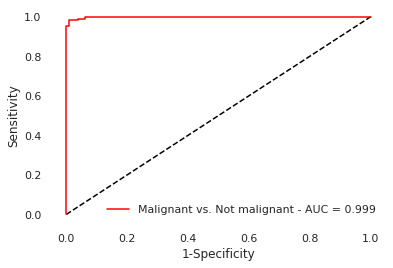

In [99]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

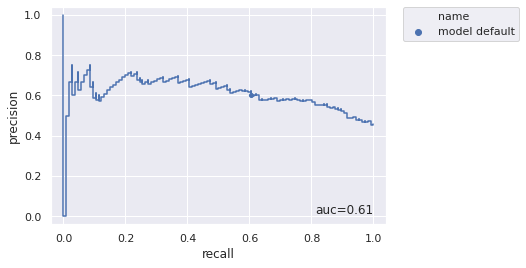

In [30]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Validation

In [100]:
results = get_results(model, validation)

In [101]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [102]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.611940324306488
Loss: 27.309444427490234


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.612,33,8,22,4,0.892,0.267,0.600,0.667,0.733,0.108,0.400,0.579,0.488
1.000,0.612,8,33,4,22,0.267,0.892,0.667,0.600,0.108,0.733,0.333,0.579,0.488


## Validation confusion matrix

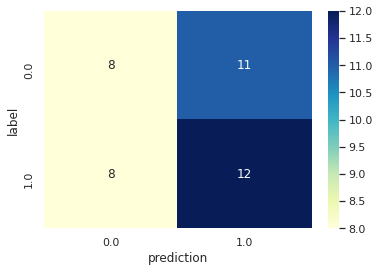

In [47]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation ROC curve

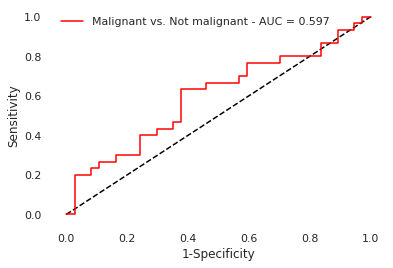

In [103]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

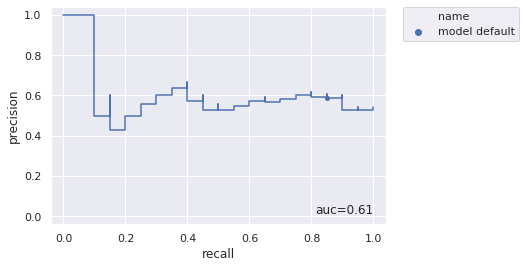

In [26]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Test

In [126]:
results = get_results(model, test)

In [127]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)
names = test.names
test_results = [['PatientID','True label','Predicted label','Probability']]
index = 0
for name in names:
    test_results.append([name, labels[index], predictions[index], probabilities[index]])
    index += 1
df = pandas.DataFrame(test_results)
df.to_csv("output/test_results/{}-{}.csv".format(UUID, result.model), header=False, index=False)
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

## Test statistics

In [128]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.5757575631141663
Loss: 8.407573699951172


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.576,13,6,9,5,0.722,0.400,0.591,0.545,0.600,0.278,0.409,0.561,0.537
1.000,0.576,6,13,5,9,0.400,0.722,0.545,0.591,0.278,0.600,0.455,0.561,0.537


## Test confusion matrix

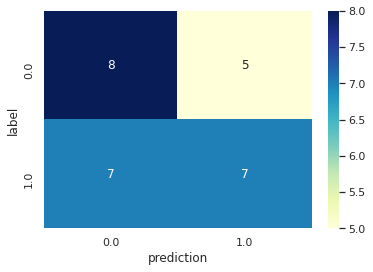

In [52]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test ROC curve

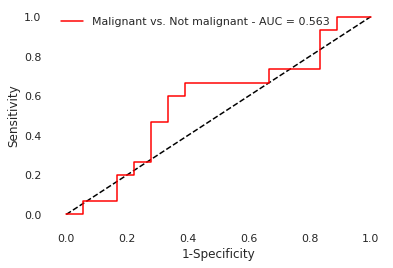

In [129]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

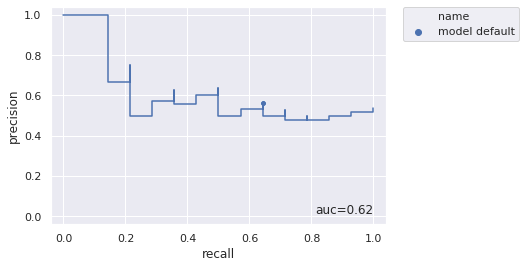

In [33]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

In [33]:
import json
hyperparameters = json.loads(result.hyperparameters)
deep_top = hyperparameters["deep-dense-top"]
grad_cam_layer = "dense_3"
if deep_top: 
    grad_cam_layer = "dense_6"

# TSNE

# Grad Cam

In [ ]:
def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="res5c_branch2c", layer="dense_3", columns=2, include_label=True):
    filter_idx = [0]
    grad_modifier = None
    backprop_modifier = None
    penultimate_layer_idx = None
    if penultimate_layer:
        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
    rows = int(math.ceil(len(images) * 2/columns))
    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
    ax = ax.flatten()
    for i, image in enumerate(images): 
        grad = visualize_cam(
            model,
            find_layer_idx(model, layer),
            filter_idx,
            normalize(image),
            penultimate_layer_idx=penultimate_layer_idx,
            backprop_modifier=backprop_modifier,
            grad_modifier=grad_modifier)
        if names is not None: 
            ax[2*i].set_title("{}".format(names[i]))
        ax[2*i].imshow(image)
        ax[2*i].axis('off')
        if include_label: 
            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
        ax[2*i+1].imshow(overlay(grad, image))
        ax[2*i+1].axis('off')
    return f, ax

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')